# Code for Implementing a Local NeuralProphet Model

***

The repository and documentation for `NeuralProphet` can be found [here](https://github.com/ourownstory/neural_prophet) and [here](https://neuralprophet.com/html/contents.html).

`neural_prophet` expects data formatted in two columns, the time index (ds) and the series values (y).

|    ds   |   y  |
|:----------:|:----:|
| 2009-10-11 | 1.21 |
|     ...    | 1.15 |
| 2012-01-21 | 1.24 |

***

## Code for Local NeuralProphet Model

Code from a basic [tutorial](https://neuralprophet.com/html/full_simple_model.html#my-reference-label2) on using `neuralprophet` but using our data.

### Import Modules and Data

In [1]:
# general modules
import pandas as pd
import numpy as np

# neuralprophet for forecasting
from neuralprophet import NeuralProphet

In [2]:
# import weekly finance time series
Y = pd.read_csv("../../../Data/Train/Clean/weekly_finance_clean.csv")

In [3]:
# store the number of series and number of time periods
num_series, num_periods = Y.shape

In [4]:
# calculate mean of each series
series_means = Y.mean(axis=1)

In [5]:
# normalize each series by the mean and log-transform
Y_t = np.log(Y.divide(series_means, axis=0))

In [6]:
# store a single series to test code
single_index = 19
y = Y_t.iloc[single_index,:]

In [7]:
# import M4 info and store the starting data of each series
m4_info = pd.read_csv("../../../Data/M4-info.csv")
start_dates = m4_info.loc[(m4_info.SP == "Weekly") & (m4_info.category == "Finance"), "StartingDate"]

In [8]:
# convert to DateTime index
y.index = pd.date_range(start=start_dates.iloc[single_index], periods=num_periods, freq="W")

In [9]:
# rename columns as needed
y_d = y.to_frame().reset_index().rename(columns = {'index':'ds', single_index:'y'})

In [10]:
y_d

,ds,y
0,2002-12-22 12:00:00,0.294982
1,2002-12-29 12:00:00,0.270356
2,2003-01-05 12:00:00,0.289561
3,2003-01-12 12:00:00,0.294982
4,2003-01-19 12:00:00,0.292275
...,...,...
242,2007-08-12 12:00:00,-0.117263
243,2007-08-19 12:00:00,-0.061693
244,2007-08-26 12:00:00,0.016268
245,2007-09-02 12:00:00,0.114820


### Train Model

In [11]:
# instantiate model
m = NeuralProphet()

In [12]:
# forecast horizon
h = 20
# train and test data
train, test = y_d.iloc[:-h,:], y_d.iloc[-h:,:]

In [13]:
# train model
train_metrics = m.fit(train, freq="W")

INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 261


  0%|          | 0/218 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.66E-01, min: 8.44E-01


  0%|          | 0/218 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.22E-01, min: 2.41E+00


  0%|          | 0/218 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.66E-01, min: 1.65E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.83E-01
Epoch[261/261]: 100%|██████| 261/261 [00:05<00:00, 43.75it/s, SmoothL1Loss=0.00201, MAE=0.0434, RMSE=0.0567, RegLoss=0]


### Generate and Evaluate Forecasts

In [14]:
# make dataframe for forecasted values
future = m.make_future_dataframe(df=train, periods=20)

In [15]:
# store real y values from test data
future.y = test.y.values

In [16]:
# generate forecasts
forecast = m.predict(df=future)

In [17]:
forecast

,ds,y,yhat1,residual1,trend,season_yearly
0,2007-04-29 12:00:00,0.101790,0.004379,-0.097411,-0.081410,0.085789
1,2007-05-06 12:00:00,0.071838,-0.012631,-0.084469,-0.070145,0.057514
2,2007-05-13 12:00:00,-0.023810,-0.020811,0.002999,-0.058879,0.038068
3,2007-05-20 12:00:00,-0.154690,-0.011255,0.143434,-0.047614,0.036359
4,2007-05-27 12:00:00,-0.035025,0.017508,0.052533,-0.036349,0.053856
5,2007-06-03 12:00:00,0.019833,0.058647,0.038814,-0.025084,0.083730
6,2007-06-10 12:00:00,0.040961,0.099504,0.058543,-0.013818,0.113322
7,2007-06-17 12:00:00,0.071838,0.126525,0.054687,-0.002553,0.129077
8,2007-06-24 12:00:00,0.088589,0.130685,0.042097,0.008712,0.121973
9,2007-07-01 12:00:00,0.065058,0.111205,0.046147,0.019978,0.091227


In [18]:
# calculate test data metrics
test_metrics = m.test(test)
test_metrics

INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.006  0.083  0.100


,SmoothL1Loss,MAE,RMSE
0,0.006093,0.082657,0.10041


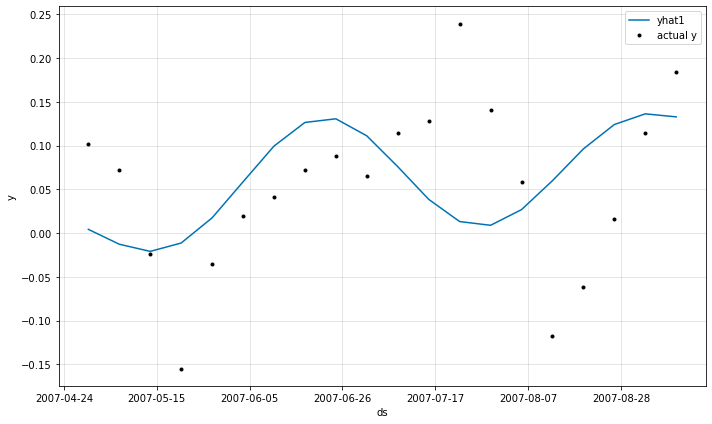

In [19]:
# plot the actual and forecasted values
fig_forecast = m.plot(forecast)

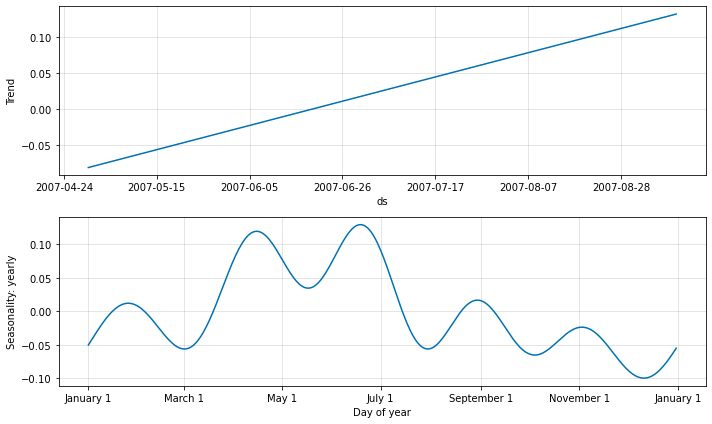

In [20]:
# plot trend and seasonal components
fig_comp = m.plot_components(forecast)

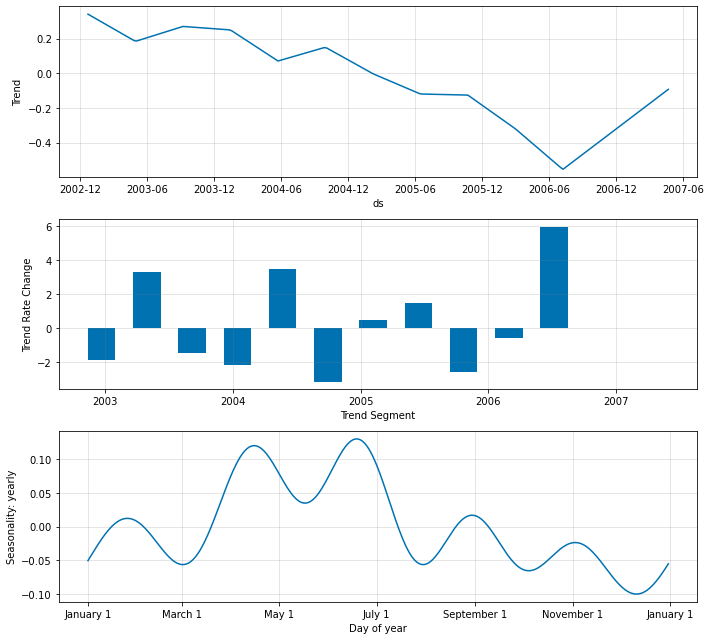

In [21]:
# plot parameters
fig_param = m.plot_parameters()

In [22]:
# generate in-sample predictions
forecast_is = m.predict(df=train)

In [23]:
forecast_is

,ds,y,yhat1,residual1,trend,season_yearly
0,2002-12-22 12:00:00,0.294982,0.257588,-0.037393,0.341795,-0.084207
1,2002-12-29 12:00:00,0.270356,0.271619,0.001262,0.333291,-0.061672
2,2003-01-05 12:00:00,0.289561,0.289609,0.000047,0.324786,-0.035177
3,2003-01-12 12:00:00,0.294982,0.305586,0.010604,0.316281,-0.010695
4,2003-01-19 12:00:00,0.292275,0.314072,0.021797,0.307776,0.006295
...,...,...,...,...,...,...
222,2007-03-25 12:00:00,-0.150461,-0.103008,0.047453,-0.137736,0.034728
223,2007-04-01 12:00:00,-0.005393,-0.049377,-0.043983,-0.126471,0.077094
224,2007-04-08 12:00:00,0.108326,-0.007131,-0.115457,-0.115206,0.108075
225,2007-04-15 12:00:00,0.213361,0.015718,-0.197643,-0.103940,0.119658


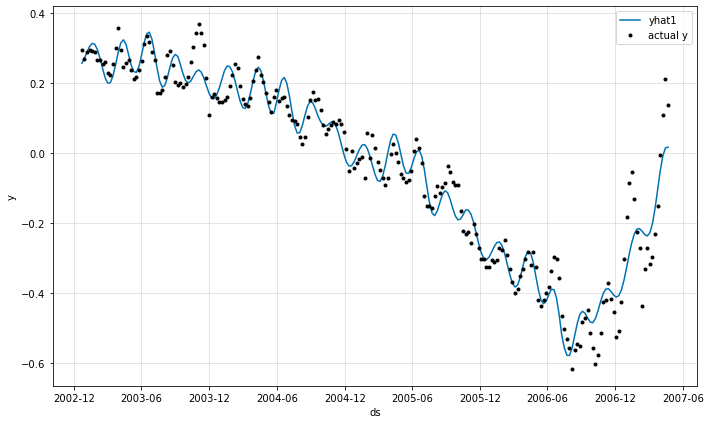

In [26]:
fig_forecast = m.plot(forecast_is)

***
***